# **Lab 3 : Israel Elections Data Analysis**
### **ID1:206094278,ID2:205926660** 


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [18]:
# Read the DF
df_ballots = pd.read_csv("votes per ballot 2020.csv", encoding = 'iso-8859-8', index_col='שם ישוב')
df_ballots = df_ballots.loc[:,["בזב","כשרים", "אמת", "ג", "ודעם",
                             "טב", "ל", "מחל","פה","שס"]]
df_ballots = df_ballots.drop('מעטפות חיצוניות')

# df_tilda = pd.DataFrame.copy(df_ballots) # camputing n_ij tilda
# for r in range(len(df_tilda)):
#     ratio = df_tilda.iloc[r,0] / df_tilda.iloc[r,1] 
#     for c in range(2,len(df_tilda.columns)):
#         df_tilda.iloc[r,c] = int(df_tilda.iloc[r,c] * ratio)
            


df_tilda = df_ballots.iloc[:,2:]*(df_ballots.loc[:,'בזב'].sum()/df_ballots.loc[:,'כשרים'].sum())

##### **Question 1**

In [17]:
# a function that compute the simulation
def simu_new(df,v):
    df_simu = pd.DataFrame.copy(df)
    df_m = df.to_numpy() # create a mtrix of nij
    v_m = v.to_numpy() # create a matrix of vij
    before = np.random.binomial(df_m.astype(int),v_m.astype(float))
    after = pd.DataFrame(data=before, columns=df.columns,index= df.index)
    return after


##### **Question 2**

#### A)  $$V_{ij} = V_i $$

In [20]:
# a. v_ij = v_i
# a function that turn vij to vi
def vi_is_vij(df):
    new_df = pd.DataFrame.copy(df)
    for i in range(len(new_df)):
        ratio = new_df.iloc[i,1] / new_df.iloc[i,0]
        new_df.iloc[i,2:] = ratio
    return new_df

df_vi = vi_is_vij(df_ballots)
df_vi = df_vi.iloc[:,2:] 
display(round(df_vi,3))

,אמת,ג,ודעם,טב,ל,מחל,פה,שס
שם ישוב,,,,,,,,
אבו גווייעד שבט,0.212,0.212,0.212,0.212,0.212,0.212,0.212,0.212
אבו גווייעד שבט,0.323,0.323,0.323,0.323,0.323,0.323,0.323,0.323
אבו גווייעד שבט,0.326,0.326,0.326,0.326,0.326,0.326,0.326,0.326
אבו גוש,0.551,0.551,0.551,0.551,0.551,0.551,0.551,0.551
אבו גוש,0.551,0.551,0.551,0.551,0.551,0.551,0.551,0.551
...,...,...,...,...,...,...,...,...
תקוע,0.737,0.737,0.737,0.737,0.737,0.737,0.737,0.737
תקוע,0.788,0.788,0.788,0.788,0.788,0.788,0.788,0.788
תראבין אצאנע שבט,0.092,0.092,0.092,0.092,0.092,0.092,0.092,0.092


#### B)  $$ V_{ij} = U_j $$

In [26]:
# a loop that allocate each number to a party
df_u_j = pd.DataFrame.copy(df_ballots).iloc[:,2:]
pro = [0.3,0.4,0.7,0.2,0.5,0.9,0.8,0.6]
for i in range(len(pro)):
    df_u_j.iloc[:,i] = df_u_j.iloc[:,i]*0 + pro[i]
    
display(df_u_j)

,אמת,ג,ודעם,טב,ל,מחל,פה,שס
שם ישוב,,,,,,,,
אבו גווייעד שבט,0.3,0.4,0.7,0.2,0.5,0.9,0.8,0.6
אבו גווייעד שבט,0.3,0.4,0.7,0.2,0.5,0.9,0.8,0.6
אבו גווייעד שבט,0.3,0.4,0.7,0.2,0.5,0.9,0.8,0.6
אבו גוש,0.3,0.4,0.7,0.2,0.5,0.9,0.8,0.6
אבו גוש,0.3,0.4,0.7,0.2,0.5,0.9,0.8,0.6
...,...,...,...,...,...,...,...,...
תקוע,0.3,0.4,0.7,0.2,0.5,0.9,0.8,0.6
תקוע,0.3,0.4,0.7,0.2,0.5,0.9,0.8,0.6
תראבין אצאנע שבט,0.3,0.4,0.7,0.2,0.5,0.9,0.8,0.6


#### C)  $$ V_{ij} = U^*_j $$
which * means that Uj is randomly choosen in each settelment

In [25]:
# a loop that allocate randomly a number to each party in each city
df_u_jstar = pd.DataFrame.copy(df_ballots).iloc[:,2:]
for i in pd.unique(df_u_jstar.index):
    ran = np.random.choice([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],size=8,replace =True)
    df_u_jstar.loc[i] =  df_u_jstar.loc[i]*0 + ran
    
display(df_u_jstar)


,אמת,ג,ודעם,טב,ל,מחל,פה,שס
שם ישוב,,,,,,,,
אבו גווייעד שבט,0.3,0.4,0.9,0.9,0.3,0.8,0.4,0.5
אבו גווייעד שבט,0.3,0.4,0.9,0.9,0.3,0.8,0.4,0.5
אבו גווייעד שבט,0.3,0.4,0.9,0.9,0.3,0.8,0.4,0.5
אבו גוש,0.2,0.4,0.3,0.3,0.7,0.6,0.4,0.6
אבו גוש,0.2,0.4,0.3,0.3,0.7,0.6,0.4,0.6
...,...,...,...,...,...,...,...,...
תקוע,0.6,0.9,0.9,0.9,0.3,0.5,0.6,0.3
תקוע,0.6,0.9,0.9,0.9,0.3,0.5,0.6,0.3
תראבין אצאנע שבט,0.8,0.2,0.8,0.5,0.6,0.9,0.4,0.2


##### **Question 2.1**

In [7]:
ratio = df_ballots.loc[:,'בזב']/df_ballots.loc[:,'כשרים']
# 50 simulation of A
# where sinAno in the simulation without correction
simA=[]
simAno =[]
for i in range(50):
    t = simu_new(df_tilda, df_vi)
    simAno.append(t)
    t = round(t.mul(ratio,axis=0))
    simA.append(t)
# 50 simulation of B  
# where sinBno in the simulation without correction
simB = []
simBno =[]
for i in range(50):
    t = simu_new(df_tilda, df_u_j)
    simBno.append(t)
    t = round(t.mul(ratio,axis=0))
    simB.append(t)
# 50 simulation of C
# where sinCno in the simulation without correction
simC = []
simCno =[]
for j in range(50):
    t=simu_new(df_tilda,df_u_jstar) 
    simCno.append(t)
    t = round(t.mul(ratio,axis=0))
    simC.append(t)

##### **Question 2.2**

In [8]:
bazab=df_ballots.loc[:,'בזב'].sum()

# turnnig each simulatin in to a vector of voteing rate for each party
for i in range(50):
    simA[i] = simA[i].sum().div(bazab)
    simB[i] = simB[i].sum().div(bazab)
    simC[i] = simC[i].sum().div(bazab)
    simAno[i]= simAno[i].sum().div(simAno[i].sum().sum())
    simBno[i]= simBno[i].sum().div(simBno[i].sum().sum())
    simCno[i]= simCno[i].sum().div(simCno[i].sum().sum())

    

##### **Question 2.3**

In [9]:
# creating q
q = df_ballots.loc[:,["אמת", "ג", "ודעם",
                             "טב", "ל", "מחל","פה","שס"]]
q= q.sum().div(q.sum().sum())

# Mean for each simulation
A_mean=pd.DataFrame(simA).sum(axis=0)/50
B_mean=pd.DataFrame(simB).sum(axis=0)/50
C_mean=pd.DataFrame(simC).sum(axis=0)/50

# Variance for each simulation
A_var = pd.DataFrame([0,1,2,3,4,5,6,7],["אמת", "ג", "ודעם",
                             "טב", "ל", "מחל","פה","שס"],columns = ['Variance A'])
for i in range(8):
    A_var.iloc[i] = np.var(pd.DataFrame(simA).iloc[:,i])

B_var = pd.DataFrame([0,1,2,3,4,5,6,7],["אמת", "ג", "ודעם",
                             "טב", "ל", "מחל","פה","שס"],columns = ['Variance B'])
for i in range(8):
    B_var.iloc[i] = np.var(pd.DataFrame(simB).iloc[:,i])

C_var = pd.DataFrame([0,1,2,3,4,5,6,7],["אמת", "ג", "ודעם",
                             "טב", "ל", "מחל","פה","שס"],columns = ['Variance C'])
for i in range(8):
    C_var.iloc[i] = np.var(pd.DataFrame(simC).iloc[:,i])





In [10]:
# MSE for each simulation
A_mse = simA
for i in range(50):
    A_mse[i] = np.square(q-simA[i])
    
A_mse=pd.DataFrame(A_mse).sum(axis=0)/50
B_mse = simB
for i in range(50):
    B_mse[i] = np.square(q-simB[i])
    
B_mse=pd.DataFrame(B_mse).sum(axis=0)/50

C_mse = simC
for i in range(50):
    C_mse[i] = np.square(q-simC[i])
    
C_mse=pd.DataFrame(C_mse).sum(axis=0)/50



In [11]:
# Bais of each simulation

A_bias = abs(A_mean-q)
B_bias = abs(B_mean-q)
C_bias = abs(C_mean-q)

In [12]:

Mean = pd.DataFrame(list([A_mean,B_mean,C_mean]),index =['A mean','B mean','C mean'],columns = ["אמת", "ג", "ודעם",
                             "טב", "ל", "מחל","פה","שס"])
Bias = pd.DataFrame(list([A_bias,B_bias,C_bias]),index =['A bias','B bias','C bias'],columns = ["אמת", "ג", "ודעם",
                             "טב", "ל", "מחל","פה","שס"])
Var =  pd.concat([pd.DataFrame.transpose(A_var), pd.DataFrame.transpose(B_var), pd.DataFrame.transpose(C_var)])

MSE =  pd.DataFrame(list([A_mse,B_mse,C_mse]),index =['A MSE','B MSE','C MSE'],columns = ["אמת", "ג", "ודעם",
                             "טב", "ל", "מחל","פה","שס"])
display(round(Mean,3))
display(round(Bias,3))
display(Var)
display(MSE)

,אמת,ג,ודעם,טב,ל,מחל,פה,שס
A mean,0.056,0.061,0.132,0.049,0.058,0.291,0.263,0.077
B mean,0.026,0.034,0.144,0.014,0.048,0.402,0.312,0.068
C mean,0.047,0.049,0.100,0.041,0.049,0.233,0.197,0.063


,אמת,ג,ודעם,טב,ל,מחל,פה,שס
A bias,0.001,0.001,0.001,0.001,0.001,0.003,0.003,0.001
B bias,0.032,0.028,0.011,0.036,0.011,0.108,0.047,0.010
C bias,0.011,0.012,0.033,0.009,0.011,0.061,0.068,0.014


,אמת,ג,ודעם,טב,ל,מחל,פה,שס
Variance A,6.128622e-09,3.968479e-09,8.239513e-09,3.332928e-09,4.140899e-09,2.902518e-08,2.470927e-08,6.732490e-09
Variance B,3.221877e-09,2.853878e-09,7.425079e-09,2.084728e-09,7.241673e-09,1.014176e-08,1.071323e-08,6.532082e-09
Variance C,3.702234e-09,4.488966e-09,9.015416e-09,3.765517e-09,4.790214e-09,2.051755e-08,2.289324e-08,2.886460e-09


,אמת,ג,ודעם,טב,ל,מחל,פה,שס
A MSE,0.000001,9.494537e-07,0.000002,0.000001,0.000001,0.000009,0.000008,0.000002
B MSE,0.001021,7.589493e-04,0.000119,0.001327,0.000123,0.011588,0.002203,0.000094
C MSE,0.000119,1.517449e-04,0.001084,0.000089,0.000115,0.003748,0.004673,0.000210


#### Conclusions:
It's possibole to notice that in simulation A (after the correction) where $V_{ij} = V_{i}$ have a mean of simulations which is the nearest to the actual election distribution with the smalest bia,mse and variance.
Also, we have notice that every metod did not succeed well to predict the percentage of votes that the "shas" party managed to achieve in the elections.
Furthermore, simulation C inconsistent results Due to the fact that the simulations have mamaged to  
predict the percentage of some parties like "the licud" or "israel biatno" but failed to predict the percentage
of other parties like "blue and white".
And finally, simulation B faild to predict the percentage of votes in every party.

All in all : the correction helped simulation that where close to the actual results of the election to get even closer to 
the actual results.
But if a party in a simulation was far from the actual results from the start the correction will move in even further
from the actual results.

##### **Question 2.4**

In [13]:
# means for q hat without nipoach for the plots
Ano_mean=pd.DataFrame(simAno).sum(axis=0)/50
Bno_mean=pd.DataFrame(simBno).sum(axis=0)/50
Cno_mean=pd.DataFrame(simCno).sum(axis=0)/50

# sd for q hat without nipoach for the plots 
Ano_sd=[0]*50
for i in range(50):
    Ano_sd[i] = np.square(simAno[i]-Ano_mean)

Ano_sd = pd.DataFrame(Ano_sd).sum(axis=0)/50
Ano_sd = np.sqrt(Ano_sd)

Bno_sd=[0]*50
for i in range(50):
    Bno_sd[i] = np.square(simBno[i]-Bno_mean)

Bno_sd = pd.DataFrame(Bno_sd).sum(axis=0)/50
Bno_sd = np.sqrt(Bno_sd)

Cno_sd=[0]*50
for i in range(50):
    Cno_sd[i] = np.square(simCno[i]-Cno_mean)

Cno_sd = pd.DataFrame(Cno_sd).sum(axis=0)/50
Cno_sd = np.sqrt(Cno_sd)







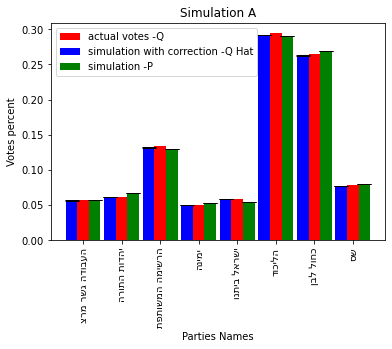

In [14]:
dict_party = {'מחל':'הליכוד','פה':'כחול לבן','ודעם':'הרשימה המשותפת','שס':'שס','ג':'יהדות התורה','אמת':'העבודה גשר מרצ','ל':'ישראל ביתנו','טב':'ימינה'}
names = ["אמת", "ג", "ודעם","טב", "ל", "מחל","פה","שס"]
rev_names = [dict_party[name][::-1] for name in list(names)]
# plot for the first simulatiom Vij=Vi
width = 0.3 
x_pos = np.arange(8)
fig, ax = plt.subplots()

q_bar=ax.bar(x_pos,q, align='center', capsize=5,width=0.3,color='r')
A_bar=ax.bar(x_pos - width ,A_mean, yerr=np.sqrt(A_var).loc[:,'Variance A'], align='center', ecolor='black', capsize=7,width=0.3,color='b')
Ano_bar=ax.bar(x_pos+width,Ano_mean, yerr=Ano_sd, align='center', ecolor='black', capsize=7,width=0.3,color='g')
ax.set_xticks(x_pos)
ax.set_title('Simulation A')
ax.set_ylabel('Votes percent')
ax.set_xlabel('Parties Names')
ax.set_xticklabels(rev_names,rotation=90)
ax.legend((q_bar[0], A_bar[0],Ano_bar[0]), ("actual votes -Q",'simulation with correction -Q Hat','simulation -P'))
plt.show()


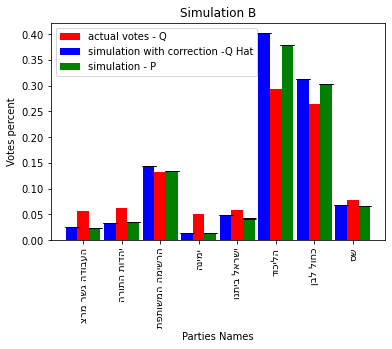

In [15]:
# plot for the second simulation (B)
width = 0.3 
x_pos = np.arange(8)
fig, ax = plt.subplots()

q_bar=ax.bar(x_pos,q, align='center', capsize=5,width=0.3,color='r')
B_bar=ax.bar(x_pos - width ,B_mean, yerr=np.sqrt(B_var).loc[:,'Variance B'], align='center', ecolor='black', capsize=7,width=0.3,color='b')
Bno_bar=ax.bar(x_pos+width,Bno_mean, yerr=Bno_sd, align='center', ecolor='black',width=0.3,capsize=7,color='g')
ax.set_xticks(x_pos)
ax.set_title('Simulation B')
ax.set_ylabel('Votes percent')
ax.set_xlabel('Parties Names')
ax.set_xticklabels(rev_names,rotation=90)
ax.legend((q_bar[0], B_bar[0],Bno_bar[0]), ("actual votes - Q",'simulation with correction -Q Hat','simulation - P'))
plt.show()

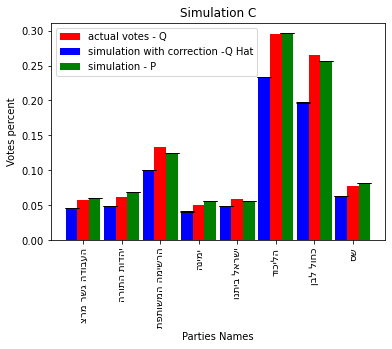

In [16]:
# plot for the third simulation(C)
width = 0.3 
x_pos = np.arange(8)
fig, ax = plt.subplots()

q_bar=ax.bar(x_pos,q, align='center', capsize=5,width=0.3,color='r')
C_bar=ax.bar(x_pos-width ,C_mean, yerr=np.sqrt(C_var).loc[:,'Variance C'], align='center', ecolor='black', capsize=7,width=0.3,color='b')
Cno_bar=ax.bar(x_pos + width,Cno_mean, yerr=Cno_sd, align='center', ecolor='black', capsize=7,width=0.3,color='g')
ax.set_xticks(x_pos)
ax.set_title('Simulation C')
ax.set_ylabel('Votes percent')
ax.set_xlabel('Parties Names')
ax.set_xticklabels(rev_names,rotation=90)
ax.legend((q_bar[0], C_bar[0],Cno_bar[0]), ("actual votes - Q",'simulation with correction -Q Hat','simulation - P'))
plt.show()


In [21]:
simu_new(df_tilda,df_vi)

,אמת,ג,ודעם,טב,ל,מחל,פה,שס
שם ישוב,,,,,,,,
אבו גווייעד שבט,1,0,26,0,0,0,2,0
אבו גווייעד שבט,4,0,123,0,0,2,0,0
אבו גווייעד שבט,5,0,92,0,1,0,0,0
אבו גוש,11,0,197,0,0,25,9,1
אבו גוש,7,0,276,0,2,15,16,0
...,...,...,...,...,...,...,...,...
תקוע,9,16,2,200,14,250,30,13
תקוע,7,9,0,345,12,221,35,15
תראבין אצאנע שבט,0,0,6,0,0,0,1,0


In [28]:
simu_new(df_tilda,df_u_j)

,אמת,ג,ודעם,טב,ל,מחל,פה,שס
שם ישוב,,,,,,,,
אבו גווייעד שבט,1,0,110,0,0,1,7,1
אבו גווייעד שבט,3,0,247,0,0,2,0,0
אבו גווייעד שבט,3,0,212,0,0,1,3,0
אבו גוש,8,0,226,0,0,45,11,0
אבו גוש,6,0,345,0,1,31,23,0
...,...,...,...,...,...,...,...,...
תקוע,2,6,2,63,6,310,33,8
תקוע,5,4,0,80,7,262,32,8
תראבין אצאנע שבט,0,0,52,0,0,0,6,0
